Задание 1

график двумерной выборки


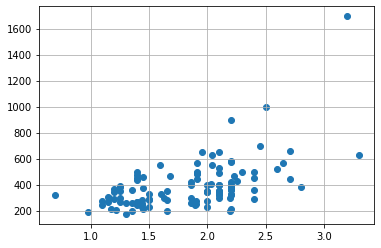

на графике значения по оси Х соответствуют значениям параметра Weight,
а по Y - Price_euros


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('график двумерной выборки')
table = pd.read_csv("laptop_price.csv",delimiter=',')
fig, ax = plt.subplots()
ax.scatter(table['Weight'], table['Price_euros'])
ax.grid()
plt.show()
print('на графике значения по оси Х соответствуют значениям параметра Weight,\nа по Y - Price_euros')

Задание 2

данные из 4 работы:
коэффициент корреляции:  0.065
выборочное среднее для Weight(или x):  1.839
выборочное среднее для Price_euros(или y):  387.198
выборочное ско для Weight(или x):  0.62
выборочное ско для Price_euros(или y):  204.565

уравнения средней квадратичной регрессии
y_x = 0.065 * 204.565 * (x - 1.839)/0.62 + 387.198
x_y = 0.065 * 0.62 * (x - 387.198)/204.565 + 1.839


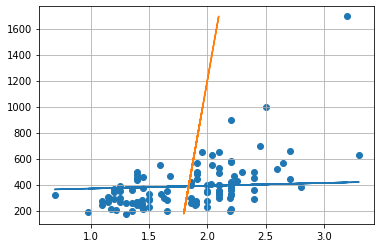

на графике видно, что все точки расположены достаточно близко к линиям регрессии, за исключением (3.20 ; 1695), которую будем считать регрессионным остатком


In [2]:
corr = 0.065
x_mid = 1.839
y_mid = 387.198
x_sko = 0.62
y_sko = 204.565
print('данные из 4 работы:')
print('коэффициент корреляции: ', corr)
print('выборочное среднее для Weight(или x): ', x_mid)
print('выборочное среднее для Price_euros(или y): ', y_mid)
print('выборочное ско для Weight(или x): ', x_sko)
print('выборочное ско для Price_euros(или y): ', y_sko)
reg_yx = lambda x: corr * y_sko * (x - x_mid)/x_sko + y_mid
reg_xy = lambda x: corr * x_sko * (x - y_mid)/y_sko + x_mid
print('\nуравнения средней квадратичной регрессии')
print(f'y_x = {corr} * {y_sko} * (x - {x_mid})/{x_sko} + {y_mid}')
print(f'x_y = {corr} * {x_sko} * (x - {y_mid})/{y_sko} + {x_mid}')
fig, ax = plt.subplots()
ax.plot(table['Weight'], reg_yx(table['Weight']))
ax.plot( reg_xy(table['Price_euros']), table['Price_euros'])
ax.scatter(table['Weight'], table['Price_euros'])
ax.grid()
plt.show()

print('на графике видно, что все точки расположены достаточно близко к линиям регрессии, '
      'за исключением (3.20 ; 1695), которую будем считать регрессионным остатком')

Задание 3

In [3]:
# Формируем корреляционную таблицу, как в 4 работе
mi_1 = [2, 12, 11, 11, 5, 2]
pi_1 = [0.0465, 0.2791, 0.2558, 0.2558, 0.1163, 0.0465]
intervals1 = []
for i in range(6):
    intervals1.append([0.495 + 0.5 * i, 0.495 + 0.5 * ( i + 1 )])

rangeTable1 = pd.DataFrame({'Промежуток': intervals1, 'mi': mi_1, 'pi': pi_1})
sortTable = table.sort_values('Price_euros')
sortTable['m_i'] = sortTable.groupby('Price_euros')['Price_euros'].transform('count')
sortTable= sortTable.drop_duplicates(subset=['Price_euros']).reset_index(drop = True)
sortTable['p*_i'] = sortTable['m_i']/sum(sortTable['m_i'])
sum_row = {'Product': 'ПРОВЕРКА','Price_euros':'', 'm_i': sum(sortTable['m_i']), 'p*_i': sum(sortTable['p*_i'])}
sortTable.append(sum_row, ignore_index=True)

mas = np.empty((23, 6))
mas.fill(0)
n = sortTable['Product'].size
k = 1 + 3.322*(np.log2(sortTable['Product'].size))//1
max_x = sortTable['Price_euros'].max()
min_x = sortTable['Price_euros'].min()
h = round((max_x - min_x)/k,3)
x0 = round(min_x - 1)
borders = []
for i in range(24):
    borders.append(x0+ i*h)

intervals = []
for i in range(len(borders)-1):
    intervals.append([round(borders[i], 3), round(borders[i+1], 3)])

mi = []
size = 0
for j in range(len(borders)-1):
    tmp = sortTable['Price_euros'].between(borders[j], borders[j+1], inclusive='right').tolist()
    for i in range(len(tmp)):
        if tmp[i]:
            size+=1
    mi.append(size)
    size = 0

rangeTable = pd.DataFrame(data={'Промежуток': intervals, 'mi': mi})
print('\n')
rangeTable['pi'] = round(rangeTable['mi']/n,4)


mas = np.empty((len(rangeTable),len(rangeTable1)))
mas.fill(0)

for k in range(len(table)):
    for i in range(len(rangeTable)):
        if rangeTable['Промежуток'][i][0] < table['Price_euros'][k] <= rangeTable['Промежуток'][i][1]:
            for j in range(len(rangeTable1)):
                if rangeTable1['Промежуток'][j][0] < table['Weight'][k] <= rangeTable1['Промежуток'][j][1]:
                    mas[i][j] += 1



cor_tab = pd.DataFrame(mas, columns=['y1', 'y2','y3','y4','y5','y6',])
cor_tab['m_xi'] = cor_tab.sum(axis=1)
m_xi = sum(cor_tab['m_xi'])
cor_tab = cor_tab.append(cor_tab.sum(axis=0), ignore_index=True)
m_yi = 0
for i in range(len(cor_tab.columns)-1):
    m_yi += cor_tab['y' + str(i+1)][len(cor_tab)-1]
###########
print('корреляционная таблица из 4 работы(x - Price_euros, y - Weight):')
print(cor_tab)
sum_cor_x = 0
sum_cor_y = 0
n = sum(cor_tab['m_xi'])

mid_intervals1 = []
for i in range(6):
    mid_intervals1.append((intervals1[i][0] + intervals1[i][1])/2)

mid_intervals=[]
print('\n')
for i in range(len(borders)-1):
    mid_intervals.append(round((borders[i] + borders[i+1])/2, 3))

x_mid_c = 0
y_mid_c = 0
x_mid2 = 0
y_mid2 = 0
x_mid_y = []
y_mid_x = []


for i in range(6):
   y_mid_c += mid_intervals1[i] * cor_tab['y' + str(i + 1)][len(cor_tab) - 1]
   y_mid2 += mid_intervals1[i]**2 * cor_tab['y' + str(i + 1)][len(cor_tab) - 1]
   x_mid_y.append(sum(cor_tab['y' + str(i + 1)].head(len(cor_tab) - 1) * mid_intervals)/  cor_tab['y' + str(i + 1)][len(cor_tab) - 1])
sum = 0
for i in range(len(cor_tab) - 1):
    x_mid_c += mid_intervals[i] * cor_tab['m_xi'][i]
    x_mid2 += mid_intervals[i]**2 * cor_tab['m_xi'][i]
    for j in range(6):
        sum+=cor_tab['y' + str(j + 1)][i] * mid_intervals1[j]
    if cor_tab['m_xi'][i] == 0:
        a = 0
    else:
        a = sum / cor_tab['m_xi'][i]
    y_mid_x.append(a)
    sum = 0
x_mid_c/= 112
y_mid_c/= 112
x_mid2/= 112
y_mid2/= 112
general_disp_x = x_mid2 - x_mid_c**2
general_disp_y = y_mid2 - y_mid_c**2
df1 = cor_tab.copy()
df1.pop('m_xi')
a=(x_mid_y - x_mid_c)**2
b=df1.iloc[len(cor_tab) - 1]
s= a*b
delta1 = 0
for i in range(len(s)):
    delta1 += s[i]
delta1/=112
print(f'проверка неравенств корреляционных отношений:\n'
      f'{round(np.sqrt(delta1/general_disp_x), 3)} > {corr}')
a = (y_mid_x - y_mid_c)**2
b = cor_tab['m_xi'].head(len(cor_tab) - 1)
s = a*b
delta2 = 0
for i in range(len(s)):
    delta2+= s[i]
delta2/=112
print(f'{round(np.sqrt(delta2/general_disp_y), 3)} > {corr}')



корреляционная таблица из 4 работы(x - Price_euros, y - Weight):
     y1    y2    y3    y4   y5   y6   m_xi
0   1.0   7.0   2.0   3.0  0.0  0.0   13.0
1   0.0  16.0  10.0   4.0  0.0  0.0   30.0
2   1.0   6.0   3.0  15.0  1.0  0.0   26.0
3   0.0   3.0   3.0   8.0  1.0  0.0   15.0
4   0.0   3.0   4.0   4.0  0.0  0.0   11.0
5   0.0   0.0   2.0   4.0  2.0  0.0    8.0
6   0.0   0.0   1.0   2.0  1.0  1.0    5.0
7   0.0   0.0   0.0   1.0  0.0  0.0    1.0
8   0.0   0.0   0.0   0.0  0.0  0.0    0.0
9   0.0   0.0   0.0   0.0  0.0  0.0    0.0
10  0.0   0.0   0.0   1.0  0.0  0.0    1.0
11  0.0   0.0   0.0   0.0  1.0  0.0    1.0
12  0.0   0.0   0.0   0.0  0.0  0.0    0.0
13  0.0   0.0   0.0   0.0  0.0  0.0    0.0
14  0.0   0.0   0.0   0.0  0.0  0.0    0.0
15  0.0   0.0   0.0   0.0  0.0  0.0    0.0
16  0.0   0.0   0.0   0.0  0.0  0.0    0.0
17  0.0   0.0   0.0   0.0  0.0  0.0    0.0
18  0.0   0.0   0.0   0.0  0.0  0.0    0.0
19  0.0   0.0   0.0   0.0  0.0  0.0    0.0
20  0.0   0.0   0.0   0.0  0.0

Задание 4

